In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
## Loading Libraries

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import warnings

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Setting columns and rows display
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings("ignore")

## Loading Data

In [3]:
## Training Data
df = pd.read_csv("Training Data - Classification of Patients with Abnormal Blood Pressure ....csv")

In [4]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [5]:
## Getting basic statistical detail of columns
df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [6]:
## checking for the classes distribution in target column
df['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [7]:
## Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

## Checking Null Percentage

In [8]:
## Function for checking percentage of null values in dataframe columns

def null_value_check_in_dataframe(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

df_null = null_value_check_in_dataframe(df)
df_null

,column_name,percent_missing
Patient_Number,Patient_Number,0.0
Blood_Pressure_Abnormality,Blood_Pressure_Abnormality,0.0
Level_of_Hemoglobin,Level_of_Hemoglobin,0.0
Genetic_Pedigree_Coefficient,Genetic_Pedigree_Coefficient,4.6
Age,Age,0.0
BMI,BMI,0.0
Sex,Sex,0.0
Pregnancy,Pregnancy,77.9
Smoking,Smoking,0.0
Physical_activity,Physical_activity,0.0


## Splitting Data into Train and Test dataset

In [9]:
## Train-Test data split (10% Test data)

train, test = train_test_split(df, train_size=0.9 ,test_size = 0.1, random_state=50, stratify=df['Blood_Pressure_Abnormality'])

## Data Analysis (EDA)

### 1. Correlation Matrix

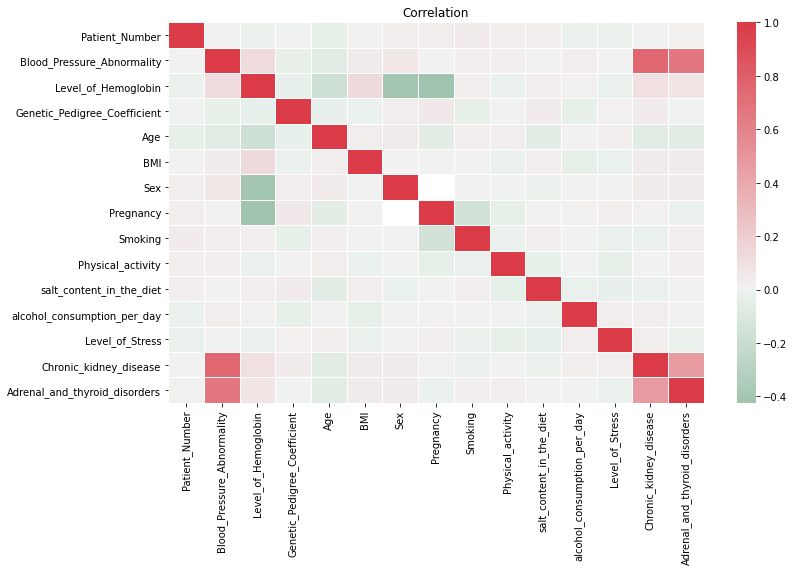

In [10]:
# calculate the correlation matrix

corr = train.corr()

# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(12)

cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        linewidths=1, cmap=cmap, center=0)

plt.title("Correlation")
plt.show()

<div style="font-size: 15px">




</div>

<div style="font-size: 15px">

Below variables having Moderate or High correlation

* `Adrenal_and_thyroid_disorders` with `Blood_Pressure_Abnormality`
* `Chronic_kidney_disease` with `Blood_Pressure_Abnormality`
* `Pregnancy` with `Sex`
* 'Blood_Pressure_Abnormality` with `Blood_Pressure_Abnormality`

</div>

### 2. Histograms (Checking for values distribution)

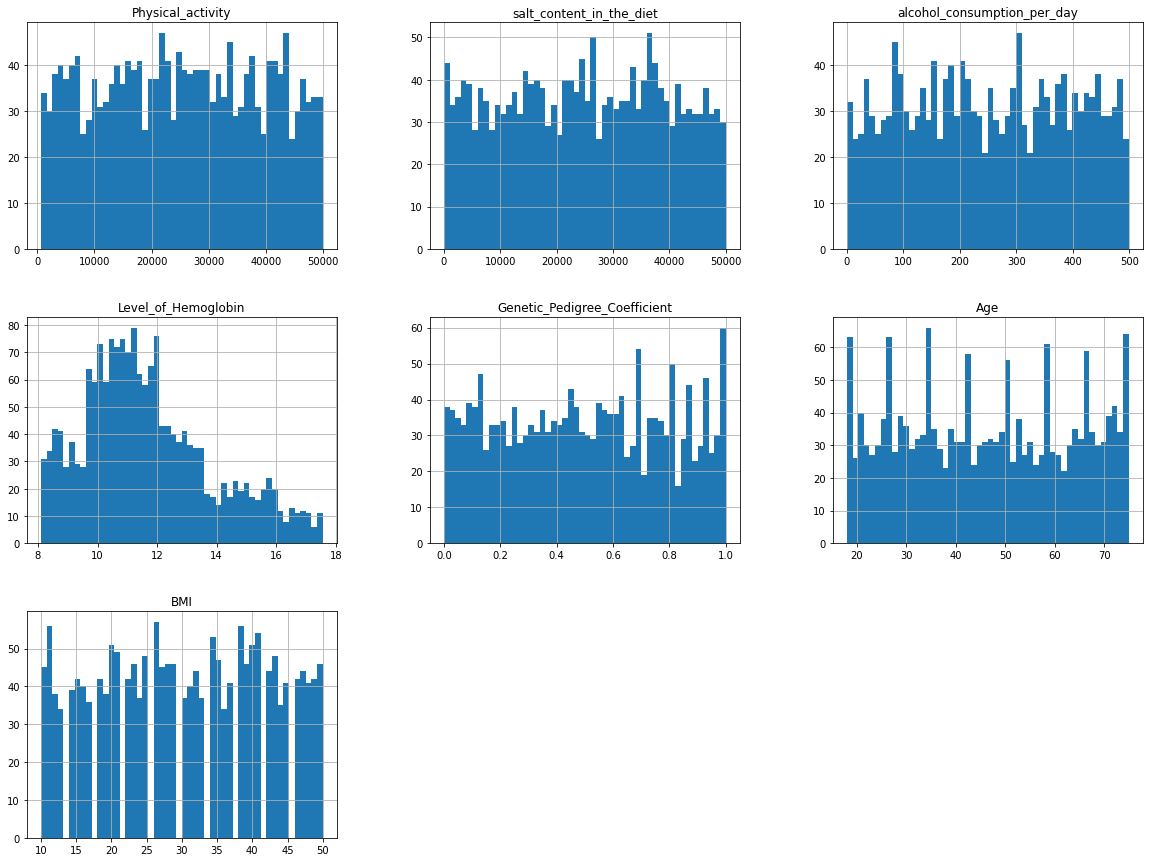

In [11]:
## Plotting histogram to check the values distribution in columns

col_for_hist = ['Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day',
               'Level_of_Hemoglobin','Genetic_Pedigree_Coefficient','Age','BMI']

fig = plt.figure(figsize = (20,15))
ax = fig.gca()

train[col_for_hist].hist(bins=50, ax = ax)
plt.show()

### 3. Boxplots (For checking Range of Values and Outliers)

<AxesSubplot:>

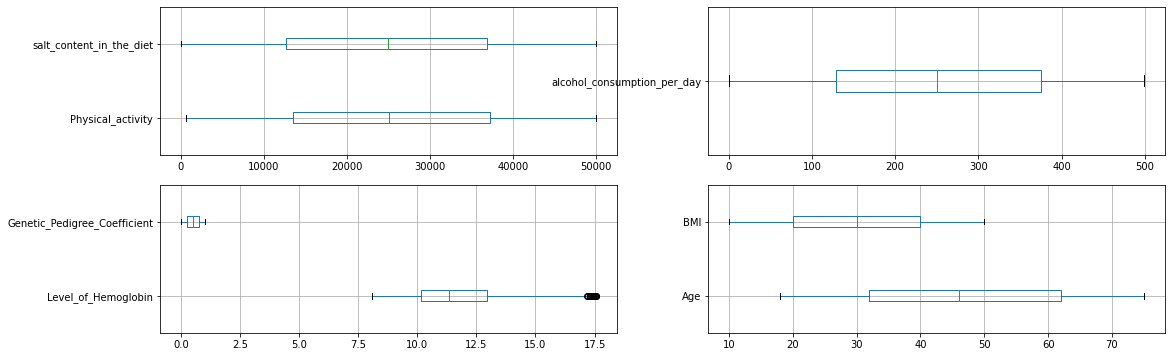

In [12]:
## Boxplot for checking the variance and outliers in data

fig, axes = plt.subplots(2, 2, figsize = (18,6))

boxplot_cols1 = ['Physical_activity','salt_content_in_the_diet']
boxplot_cols2 = ['alcohol_consumption_per_day']
boxplot_cols3 = ['Age','BMI']
boxplot_cols4 = ['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient']

train[boxplot_cols2].plot.box(vert = False, grid = True, ax=axes[0][1])
train[boxplot_cols1].plot.box(vert = False, grid = True, ax=axes[0][0])
train[boxplot_cols4].plot.box(vert = False, grid = True, ax=axes[1][0])
train[boxplot_cols3].plot.box(vert = False, grid = True, ax=axes[1][1])

### 4.Scatter Matrix Plot

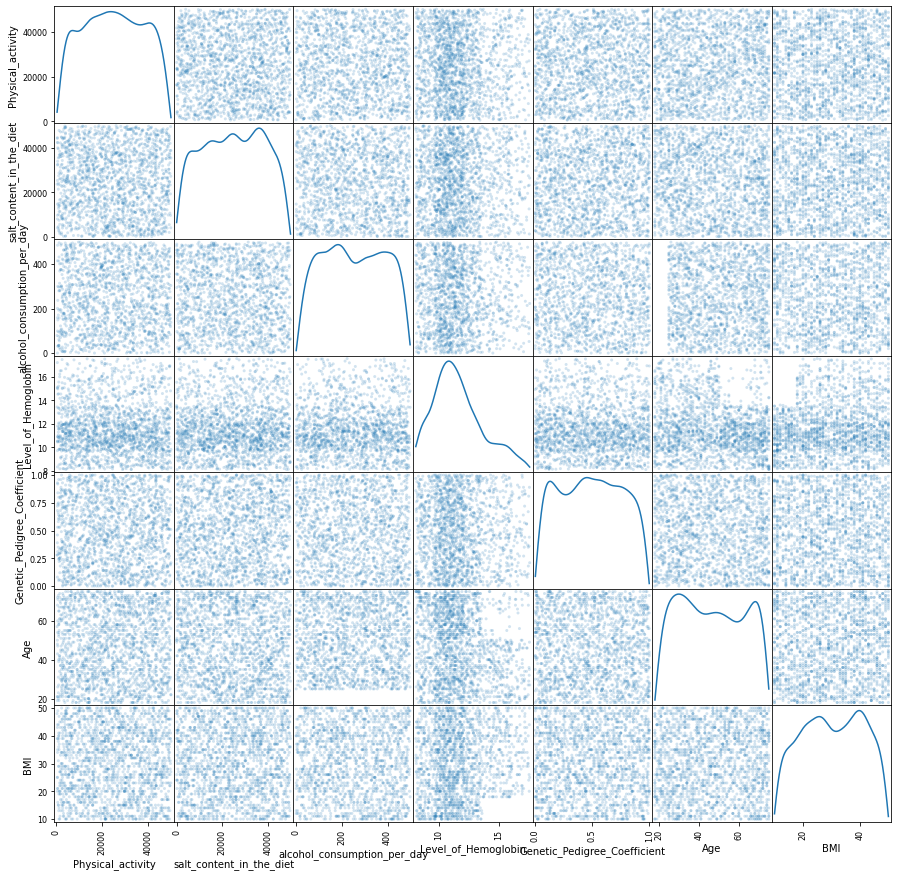

In [42]:
## Checking for the relationship between numerical variables through scatter plot

df_scatter = train[col_for_hist]
scatter_matrix(df_scatter, alpha=0.2, figsize=(15, 15), diagonal="kde");

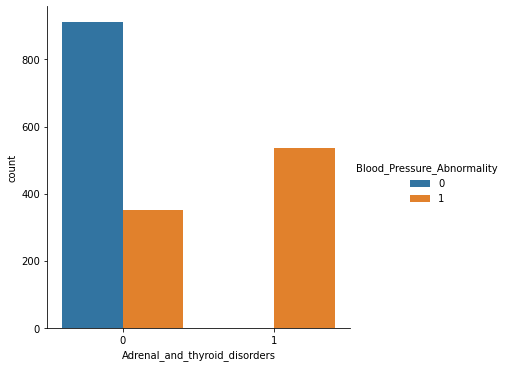

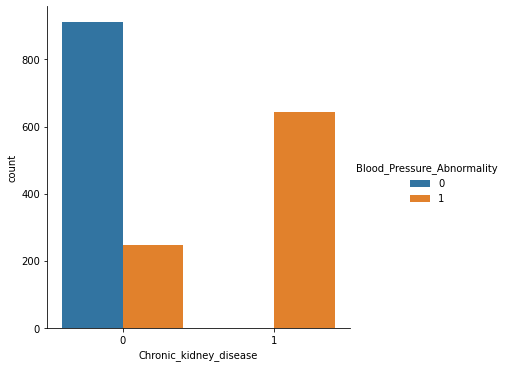

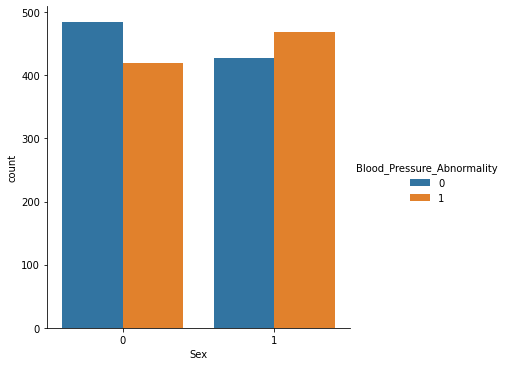

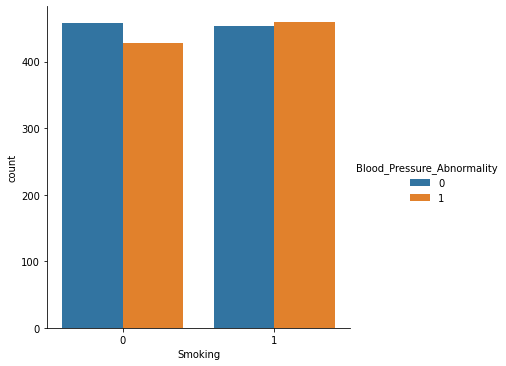

In [44]:
## Barplots for various categorical variable to check the effect on Target variable (or is there any association)

sns.catplot(x="Adrenal_and_thyroid_disorders", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Chronic_kidney_disease", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Sex", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Smoking", kind="count", hue="Blood_Pressure_Abnormality", data=train)
plt.show()

## Missing Value Imputation

In [13]:
## Fuction for Missing value imputation using IterativeImputer

def missing_value_imputation(df):
    
    ## Creating copy of a dataframe
    df_imputed = df.copy()

    ## Imputing 'Pregnancy' column values, putting Pregnancy=0 where Sex=0
    #train['Pregnancy'] = np.where(train['Sex'] == 1, train['Pregnancy'], 0)
    mask = df_imputed['Sex'] == 0
    df_imputed.loc[mask, 'Pregnancy'] = 0

    ## Remaining 'NaN' value is replaced with -1 (left Nan if for Sex=1, so created a separated category for those)
    df_imputed['Pregnancy'].fillna(-1, inplace=True)
    
    ## Changing the column type to 'int', it was 'float' earlier
    df_imputed['Pregnancy'] = df_imputed['Pregnancy'].astype(int)
    
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ## Imputing missing values using Iterative Imputer for columns 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day'

    # Define modeling pipeline
    model = ExtraTreesRegressor(n_estimators=20, random_state=0)
    imputer = IterativeImputer(estimator=model)

    # Fitting the model
    imputer.fit(df_imputed)

    imputed_values = pd.DataFrame(imputer.transform(df_imputed), columns=df_imputed.columns)

    imputed_values['Patient_Number'] = imputed_values['Patient_Number'].astype(int)
    imputed_values_subset = imputed_values[['Patient_Number','Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']]


    df_imputed.drop(['Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day'], axis = 1, inplace=True)
    df_imputed = pd.merge(df_imputed,imputed_values_subset, on=['Patient_Number'], how='left')
    
    return df_imputed


### <ins> Strategy choosen for missing value Imputation </ins>

<p></p>


<div style="font-size: 15px">
    
I have Imputed all the missing values though **Iterative imputation** along with **ExtraTrees** as a regressor

**Iterative imputation** or **multivariate imputation by chained equations (MICE)** refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.
</div>

### <ins> Reason for choosing the applied imputation </ins>

<p></p>

<div style="font-size: 15px">
    
Multiple Imputations are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds.
    
</div>

## Data Normalization

In [14]:
## Function for normalizing data using MinMaxScaler

def data_normalization(df):
    
    # Normalization - MinMaxScaler Transform
    cols_to_transform = ['Level_of_Hemoglobin','Age','BMI','Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day']
    df_to_transform = df[cols_to_transform]

    trans = MinMaxScaler()
    scaled_features = trans.fit_transform(df_to_transform)

    # convert the array back to a dataframe
    df_transformed = pd.DataFrame(scaled_features, index=df_to_transform.index, columns=df_to_transform.columns)

    df_subset = df.drop(cols_to_transform, axis=1)
    df_train_transformed = pd.concat([df_transformed,df_subset], axis=1)
    
    return df_train_transformed

## One-Hot Encoding

In [15]:
## Function for performing the one-hot encoding of categorical variables

def oneHotEncoding(df):
    
    ## Creating one-hot encoding of categorical columns
    df = pd.get_dummies(df, columns=['Pregnancy','Level_of_Stress'])

    ## Dropping column 'Patient_Number' as it is unique id of patient, so not useful for analysis
    df.drop(['Patient_Number'], axis=1, inplace=True)
    
    return df

In [16]:
## Function for data preparation (which does data cleaning, normalization and column encoding)

def data_preparation(df):
    
    df_missing_value_imputation = missing_value_imputation(df)
    df_data_normalized = data_normalization(df_missing_value_imputation)
    df_onehot_encoding = oneHotEncoding(df_data_normalized)
    
    return df_onehot_encoding
    

## Train and Test Data Preparation

In [17]:
## Data Preparation for Training dataframe
df_train_cleaned = data_preparation(train)

## Data Preparation for Test dataframe
df_test_cleaned = data_preparation(test)

## Seperating out Independent and Dependent variables

In [32]:
df_train_cleaned.shape

(1800, 18)

In [18]:
# Putting feature variable to X_train and X_test
X_train = df_train_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)
X_test = df_test_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)

# Putting response variable to y_train and y_test
y_train = df_train_cleaned['Blood_Pressure_Abnormality']
y_test = df_test_cleaned['Blood_Pressure_Abnormality']

## Building Random Forest classifier model

In [19]:
# Creating a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

# Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predicting probabilities
rf_probs = clf.predict_proba(X_test)

# keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predicting labels
y_pred=clf.predict(X_test)

## Metrics Calculation

<br>
<div style="font-size: 15px">
    
calculating different metrics to check the model performance on Test data
    
<div>

In [34]:
## Calculating different model metrics
print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Accuracy  :: 0.945
Recall    :: 0.899
Precision :: 0.989
F1 Score  :: 0.942
AUC Score :: 0.976

Classification Report ::

               precision    recall  f1-score   support

           0       0.91      0.99      0.95       101
           1       0.99      0.90      0.94        99

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



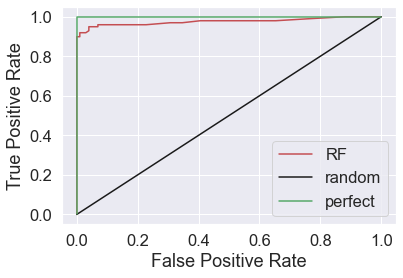

In [35]:
## Plotting ROC curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, rf_probs)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

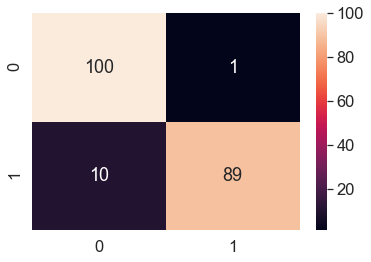

In [40]:
## Plotting confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.show()

## Feature Importance

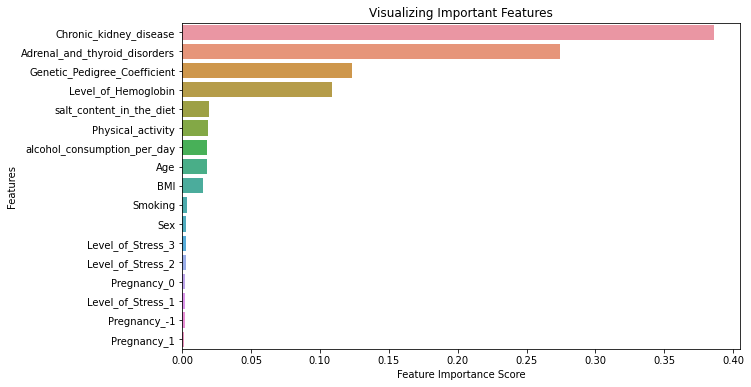

In [21]:
## Calculating Feature Importance
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot for Feature Importance
fig = plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<div style="font-size: 15px">

Based on the Feature Importance we can select the subset of features, lets say Top 10 features or the features which account for 95% of the importance. The same number of features must be used in the training and testing sets.
    
Then We have build the model gain on Train dataset and prediction on Test dataset

<div>

## Testing out multiple models

<br>
<div style="font-size: 15px">

The Idea here is to try out multiple classification models and choose the best one based on the evaluation metrics and Training/Testing time.

<div>

In [22]:
## Trying out different classification models and then we'll choose the best based on the different metrics saved

## Function for running different experiments or different models and caturing their respective metrices
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    # variable to hold all of the datasets that will be created from the application of k-fold cross validation on the training set
    dfs = []
    
    # list of tuples holding the name and class for each classifier to be tested
    models = [('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(eval_metric='logloss'))
             ]

    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    for name, model in models:

      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
      cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

      clf = model.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      print(name)
      print(classification_report(y_test, y_pred))

      results.append(cv_results)
      names.append(name)

      this_df = pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
      final = pd.concat(dfs, ignore_index=True)

    return final

In [23]:
## Calling model experimentation function
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       101
           1       1.00      0.86      0.92        99

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

RF
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       101
           1       1.00      0.90      0.95        99

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

KNN
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       101
           1       1.00      0.85      0.92        99

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

SVM
 

In [24]:
## To obtain better estimates of the distribution of metrics from each model, ran empirical bootstrapping at 30 samples. 
## Additionally, partitioned the data into two sorts: performance metrics and fit-time metrics.

bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')

# fit time metrics
time_metrics = ['fit_time','score_time'] 

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

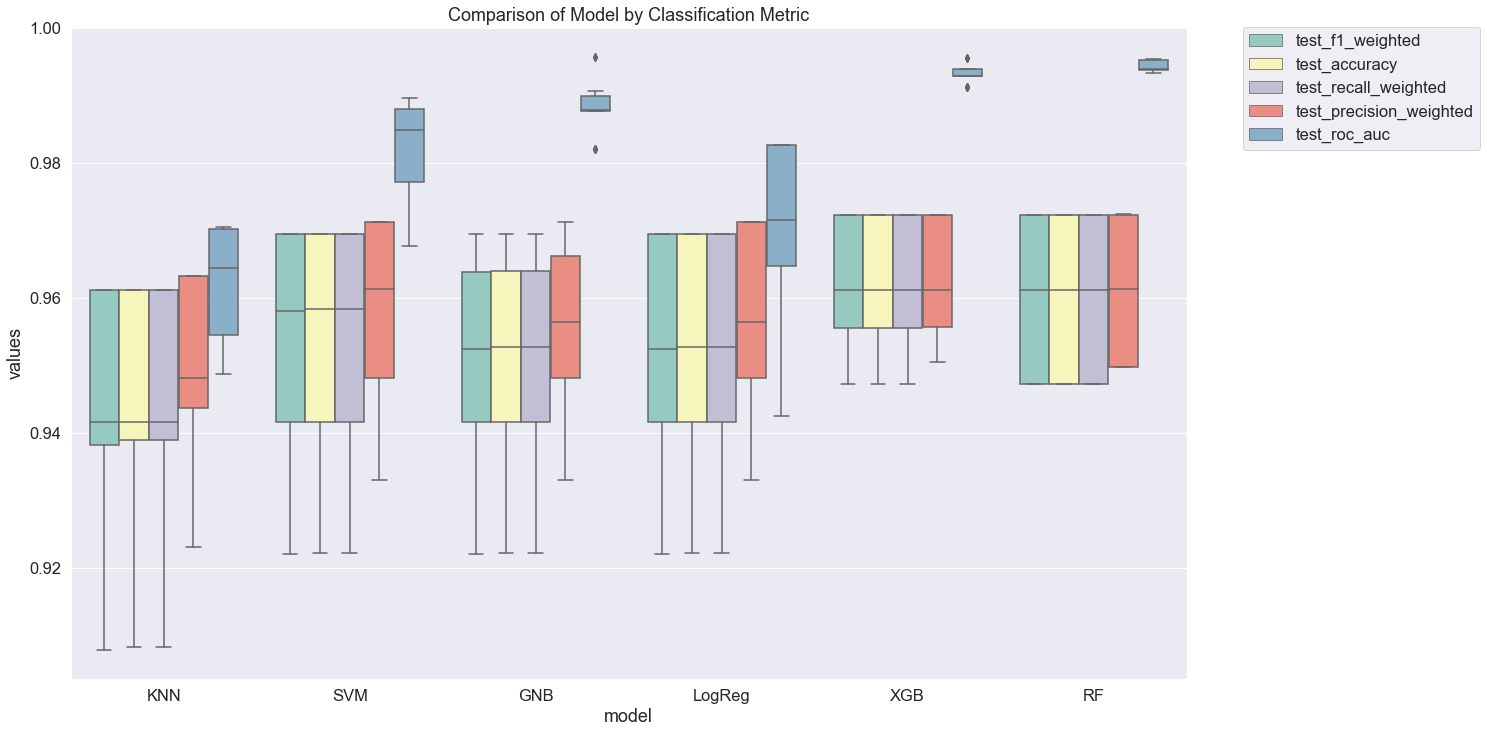

In [27]:
## Plotting performance metrics from the 5-fold cross validation.

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.show()

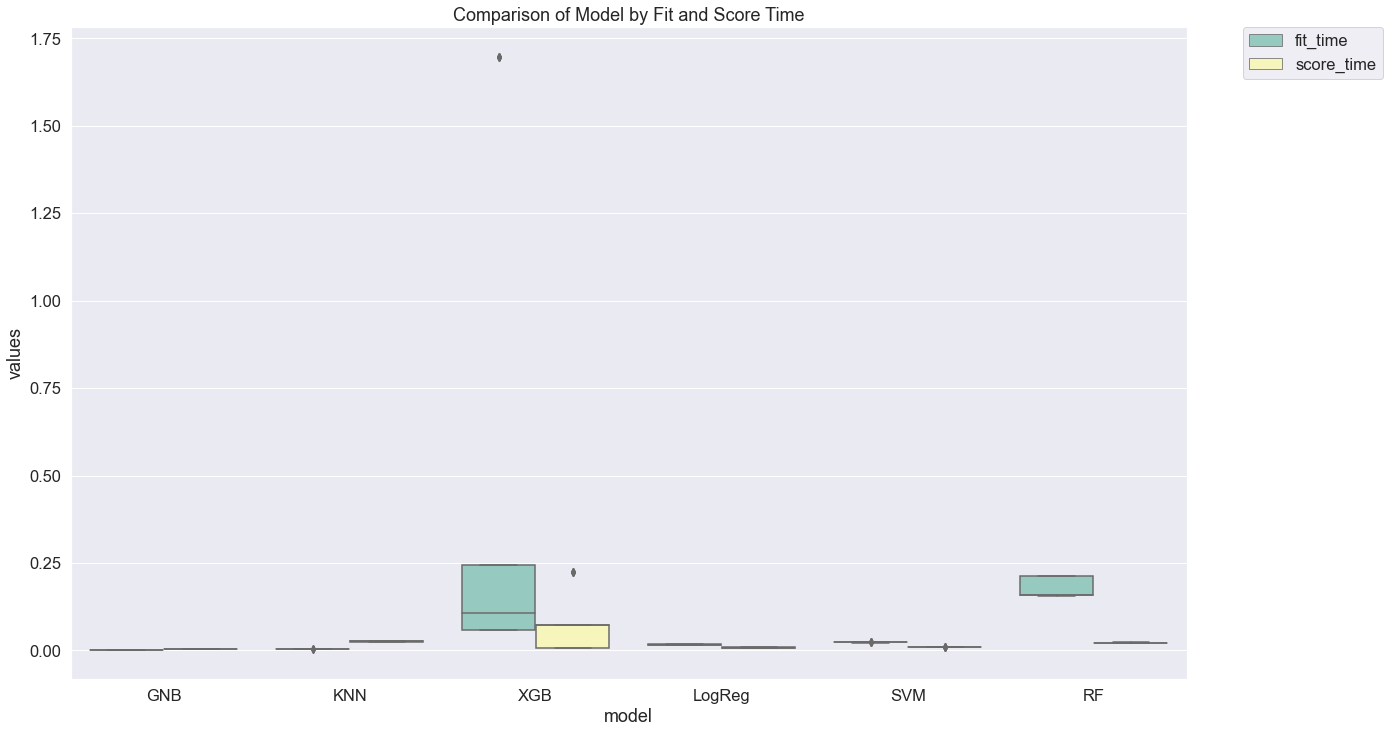

In [29]:
## Training and Scoring time comparison by plotting

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.show()

In [30]:
## Evaluation metrics details for all the trained models

metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_precision_weighted            \
                        std      mean                     std      mean   
model                                                                     
GNB                0.017384  0.950185                0.014002  0.955208   
KNN                0.019583  0.939537                0.014894  0.945979   
LogReg             0.017250  0.951944                0.013984  0.956649   
RF                 0.010843  0.960926                0.009811  0.961831   
SVM                0.016432  0.953333                0.013352  0.957756   
XGB                0.009353  0.961667                0.008345  0.962355   

       test_accuracy           test_f1_weighted           test_roc_auc  \
                 std      mean              std      mean          std   
model                                                                    
GNB         0.017384  0.950185         0.017434  0.950060     0.003815   
KNN         0.019583  0.939537         0.019739  0.939259     0.009053   
LogReg      0.017250  0.951944         0.017303  0.951823     0.014427   
RF          0.010843  0.960926         0.010830  0.960918     0.000807   
SVM         0.016432  0.953333         0.016481  0.953216     0.007505   
XGB         0.009353  0.961667         0.009347  0.961660     0.001325   

                  
            mean  
model             
GNB     0.987898  
KNN     0.961984  
LogReg  0.970810  
RF      0.994301  
SVM     0.982226  
XGB     0.993203

In [31]:
## Training and prediction time calculation for all the trained models

time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
GNB      0.000119  0.005005  0.000076  0.002196
KNN      0.000538  0.025873  0.000091  0.003343
LogReg   0.000994  0.008605  0.001479  0.017066
RF       0.000623  0.022190  0.026872  0.176745
SVM      0.000356  0.010492  0.001147  0.023478
XGB      0.082741  0.072441  0.648480  0.430295

<div style="font-size: 15px">

Based on the Evaluation Metrics (Accuracy, Precision Recall, F1-score etc.) **Random Forest(RF)** isary (or oth by far the best model. But it is having slightly higher model training time (fit_time) compared to other models (except XGBoost, which is even having higer training time).
    
Either we can choose the Random Forest (as a best model) or go for second best model (in terms of prediction metrics and training time which is **GNB(Gaussian Naive Bayes)**
    
So, this is basically an trade-of between the Accuracy(or other metrics for that matter) and the Training time, so we have to decide which one to choose if we have comparable model(slightly high/low prediction metrics and high/low mdel building/training time) because there is cost involve in that (Time + resources) and every business is having different context to look into this.
    
Once the model is finalized, then we'll go for the **Hyperparameter tuning** in oder to improve the model Accuracy further ( We'll have to decide based on the business objective whethere we really need this or not).

<div>